## **Importing the dependencies**

In [1]:
# Core libraries
import numpy as np      # for numerical operations
import pandas as pd     # for data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt     # for plotting graphs
import seaborn as sns     # for enhanced data visualization (based on matplotlib)

# Preprocessing
from sklearn.preprocessing import LabelEncoder      # to convert categorical labels into numeric form

# Handling imbalanced datasets
from imblearn.over_sampling import SMOTE      # Synthetic Minority Over-sampling technique

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score     # split data and cross-validation

# Machine learning models
from sklearn.tree import DecisionTreeClassifier     # Decision Tree classifier
from sklearn.ensemble import RandomForestClassifier     # Random Forest classifier
from xgboost import XGBClassifier     # XGBoost classifier (effeicient gradient boosting)

# Metrics for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report     # model evaluation metrics

# Saving the model
import pickle     # to serialize (save) trained models

## **Data Loading & Understanding**

In [2]:
# Reading the Telco Customer Churn dataset from a CSV file and storing it in a dataFrame 'df'
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Get the number of rows and columns
df.shape

(7043, 21)

In [4]:
# Show first 5 rows of the dataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Show all columns
pd.set_option('display.max_columns', None)

In [6]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [7]:
# Summary of columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [9]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
# List all column names in the DataFrame
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# Show unique values
print(df["gender"].unique())      # in the 'gender' column
print(df["SeniorCitizen"].unique())     # in the 'SeniorCitizen' column

['Female' 'Male']
[0 1]


In [12]:
# List of selected numerical features
numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

# Loop through all columns and print unique values for non-numerical columns
for col in df.columns:
  if col not in numerical_features_list:      # skip numerical columns
    print(col, df[col].unique())      # print column name and its unique values
    print("-"*50)     # print a separator line for better readability

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [13]:
# Print count of missing values in each column
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
# Display rows where 'TotalCharges' is blank (empty string)
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
# Count rows where 'TotalCharges' is blank
len(df[df["TotalCharges"]==" "])

11

In [16]:
# Replace blank strings with "0.0" in 'TotalCharges' column
df["TotalCharges"] = df["TotalCharges"].replace({" " : "0.0"})

In [17]:
# Convert 'TotalCharges' column to float data type
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
# Count how many Yes/No in 'Churn'
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**
  1. Customer ID removed as it is not required for modelling
  2. No missing values in the dataset
  3. Missing values in the TotalCharges column were replaced with 0.0
  4. Class imbalance identifieed in the target

## **Exploratory Data Analysis**

In [20]:
df.shape

(7043, 20)

In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [23]:
# Summary stats for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### **Nnumerical Features Analysis**

### Understanding the distribution of the Numerical features

In [24]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(7.5, 4.5))

  sns.histplot(df[column_name], kde=True)     # draw a histogram with a smooth curve (KDE)
  plt.title(f"Distribution of {column_name}")     # add title to the plot

  col_mean = df[column_name].mean()     # get the average value of the column
  col_median = df[column_name].median()     # get the middle value of the column

  # Draw a red dashed line at the mean
  plt.axvline(col_mean, color='red', linestyle='dashed', label="Mean", linewidth=1)
  # Draw a green dashed line at the median
  plt.axvline(col_median, color='green', linestyle='dashed', label="Median", linewidth=1)

  plt.legend()      # show labels for mean and median

  plt.show()      # display the plot

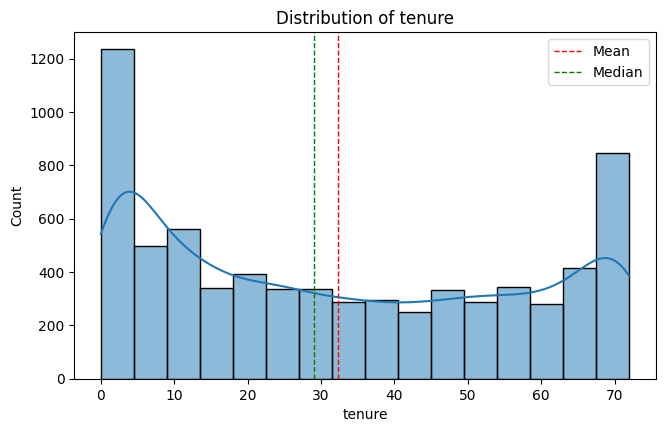

In [25]:
# Show histogram of 'tenure' with mean and median lines
plot_histogram(df, "tenure")

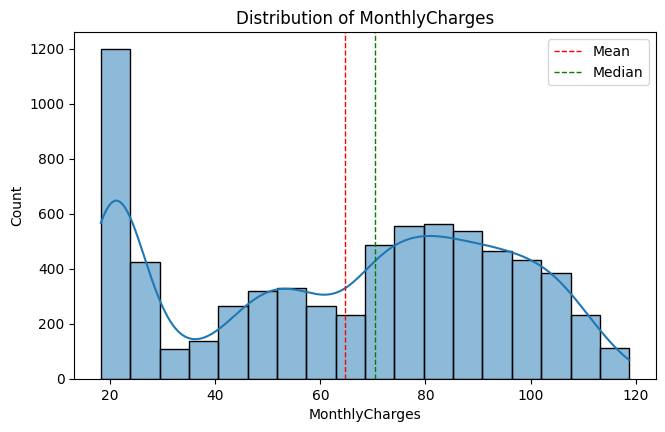

In [26]:
# Show histogram of 'MonthlyCharges' with mean and median lines
plot_histogram(df, "MonthlyCharges")

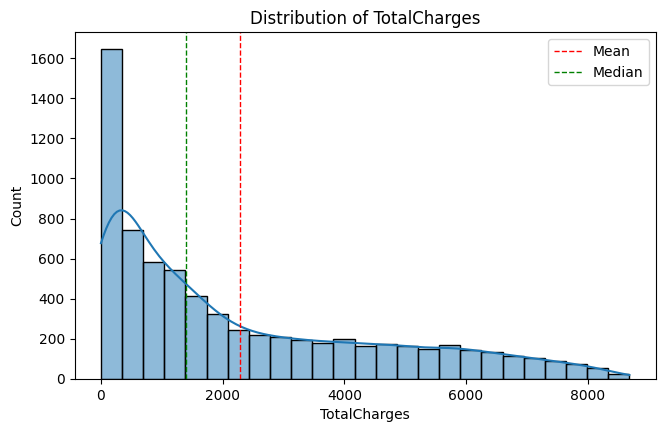

In [27]:
# Show histogram of 'TotalCharges' with mean and median lines
plot_histogram(df, "TotalCharges")

### Box plot for Numerical features

In [28]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(7.5, 4.5))     # set the size of the plot

  sns.boxplot(y=df[column_name])     # draw a boxplot
  plt.title(f"Boxplot of {column_name}")     # add title to the plot
  plt.ylabel(column_name)     # add y-axis label

  plt.show()      # display the plot

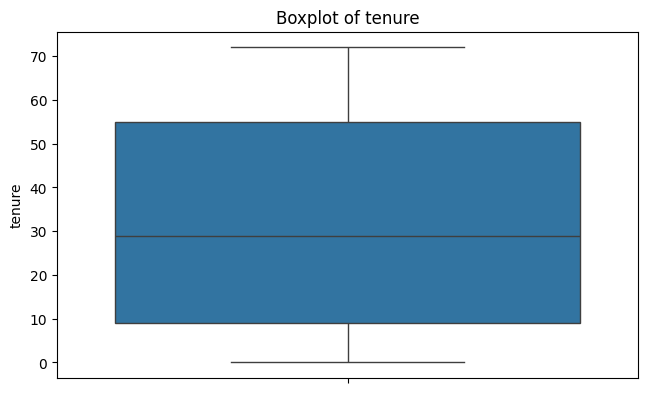

In [29]:
# Show boxplot of 'tenure' to see distribution and outliers
plot_boxplot(df, "tenure")

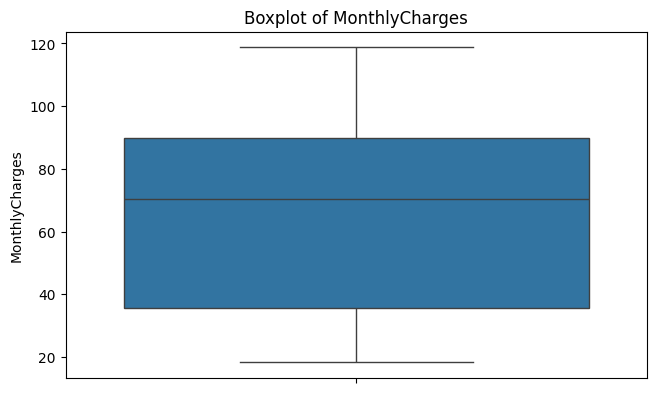

In [30]:
# Show boxplot of 'MonthlyCharges' to see distribution and outliers
plot_boxplot(df, "MonthlyCharges")

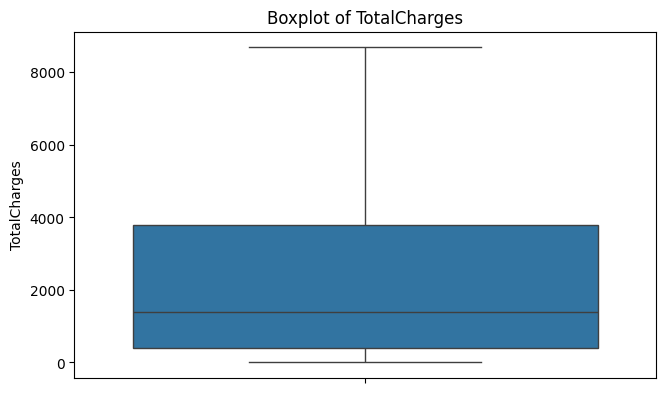

In [31]:
# Show boxplot of 'TotalCharges' to see distribution and outliers
plot_boxplot(df, "TotalCharges")

### Correlation Heatmap for Numerical columns

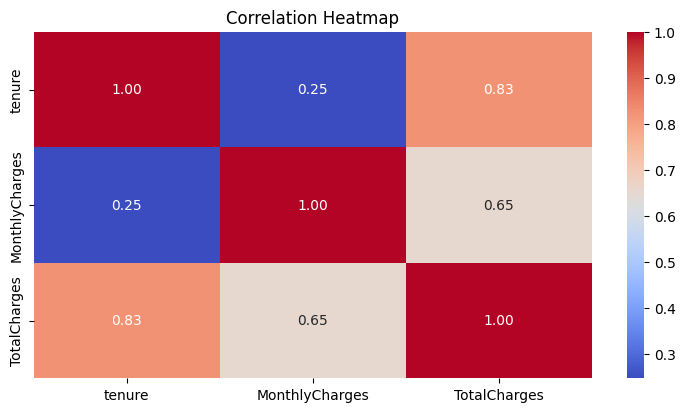

In [32]:
plt.figure(figsize=(9, 4.5))     # set the size of the heatmap

# Create a heatmap showing correlation between selected numerical features
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(),
            annot=True,     # show correlation values inside the boxes
            cmap="coolwarm",      # color scheme from blue (low) to red (high)
            fmt=".2f")      # format numbers to 2 decimal places

plt.title("Correlation Heatmap")      # add title to the heatmap
plt.show()      # display the heatmap

### **Categorical Features Analysis**


In [33]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Countplot for Categorical columns

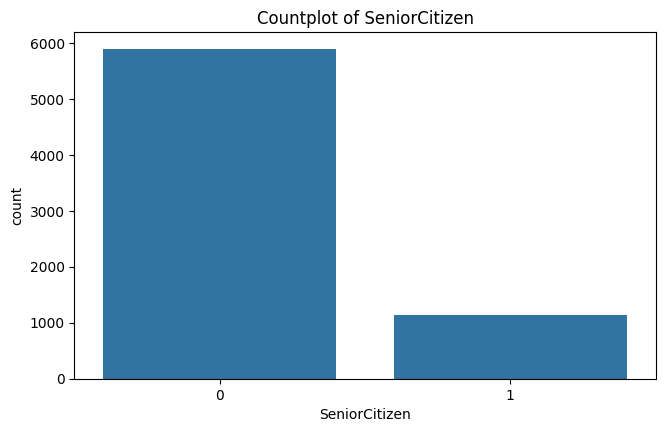

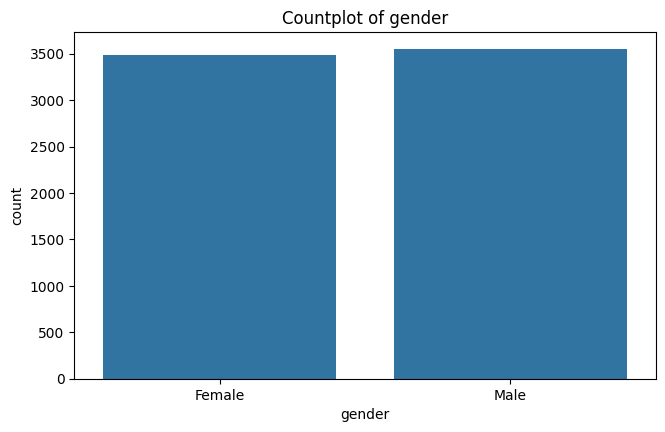

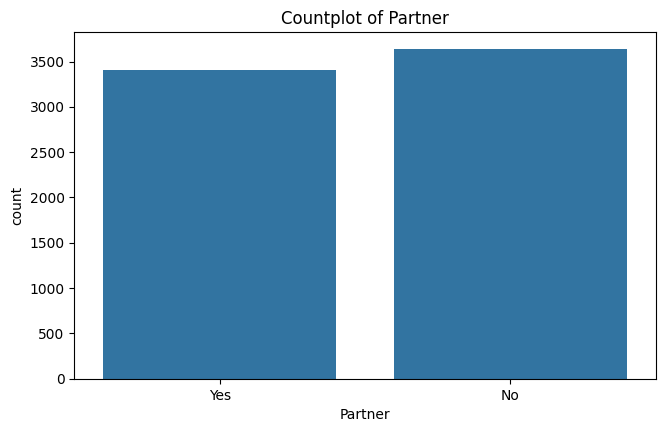

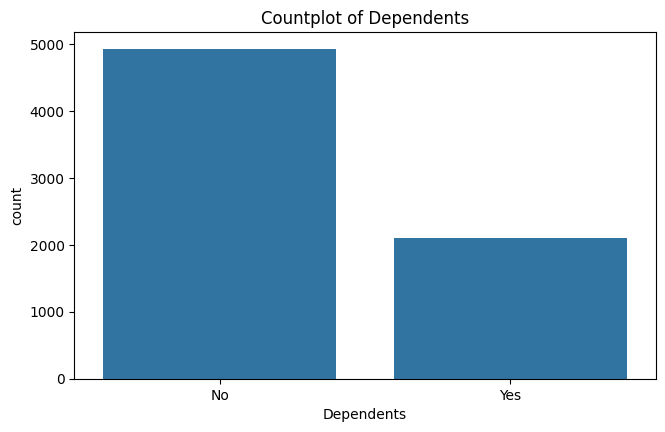

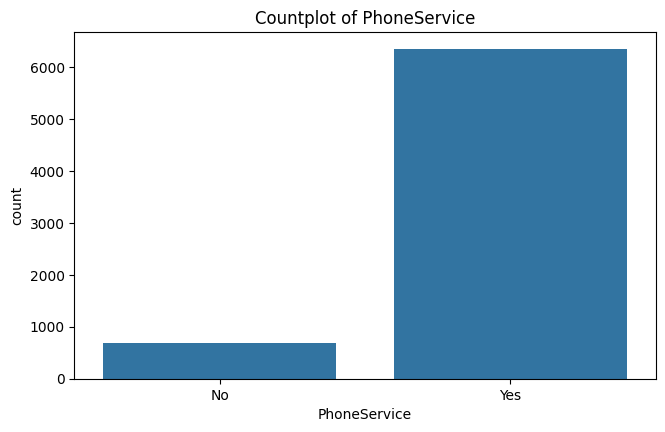

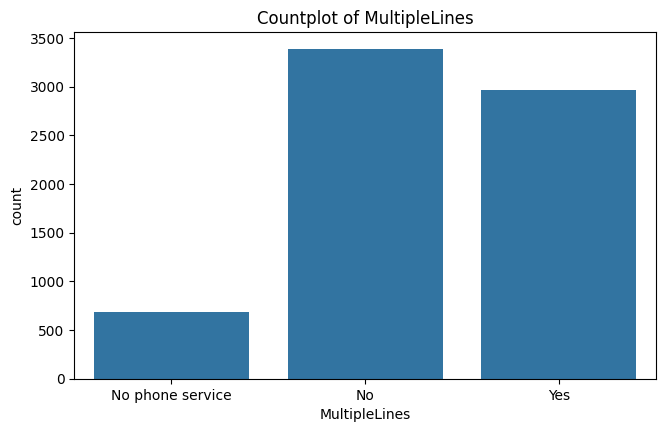

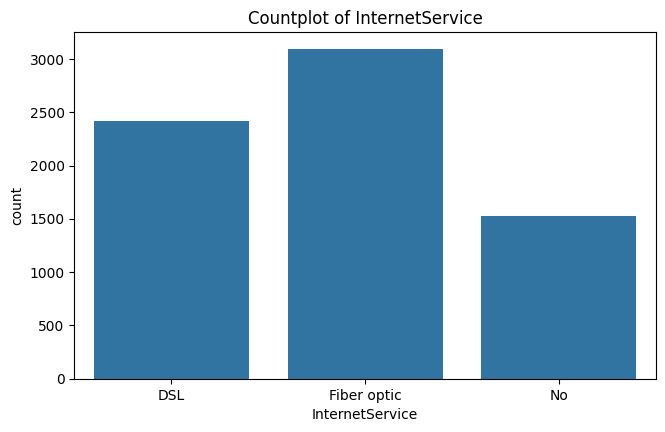

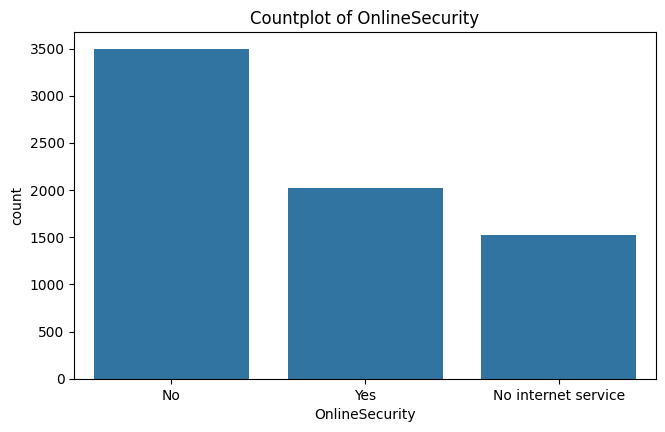

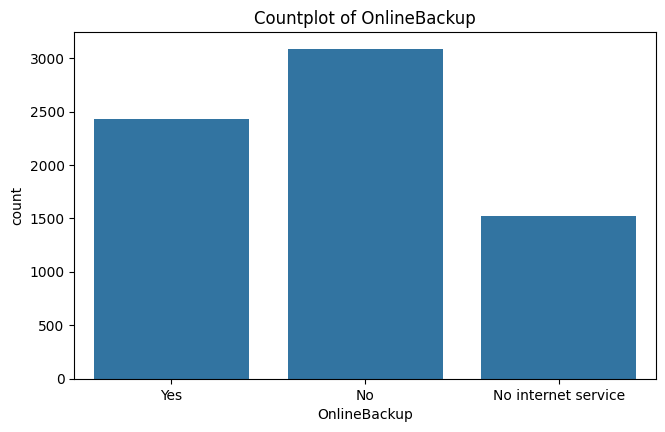

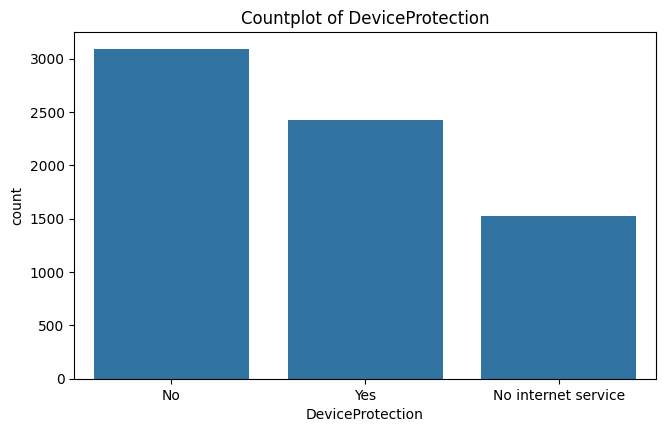

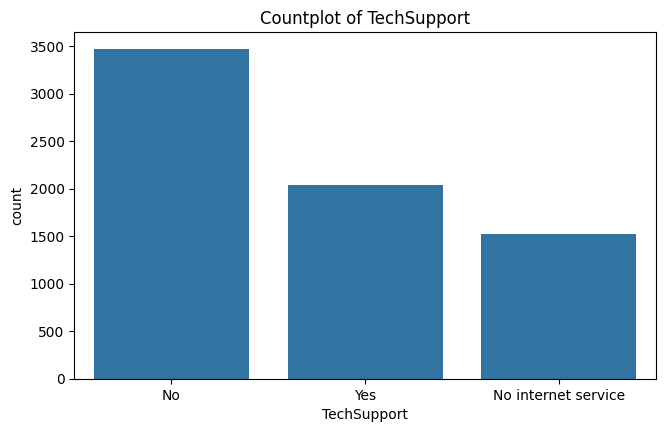

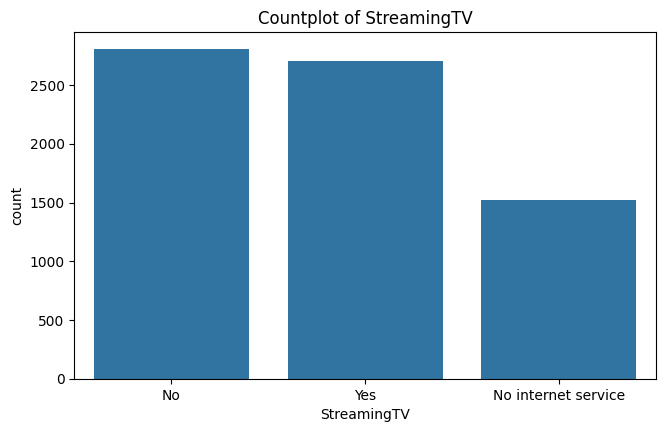

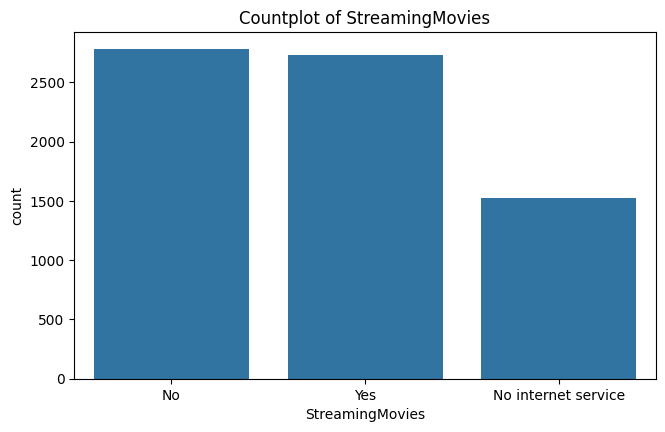

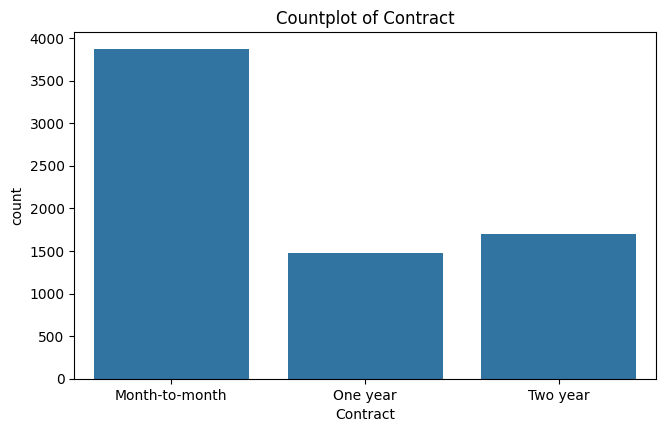

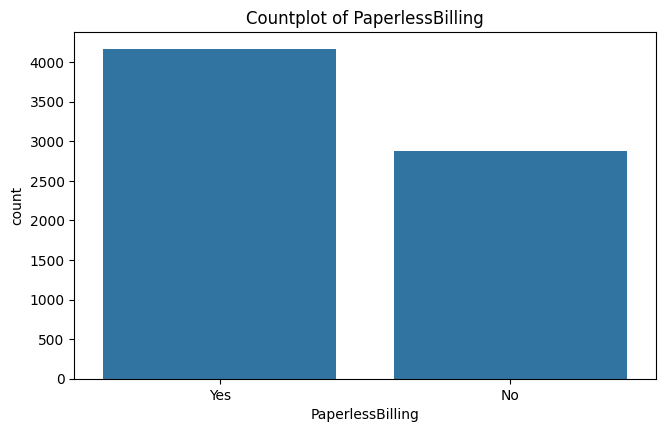

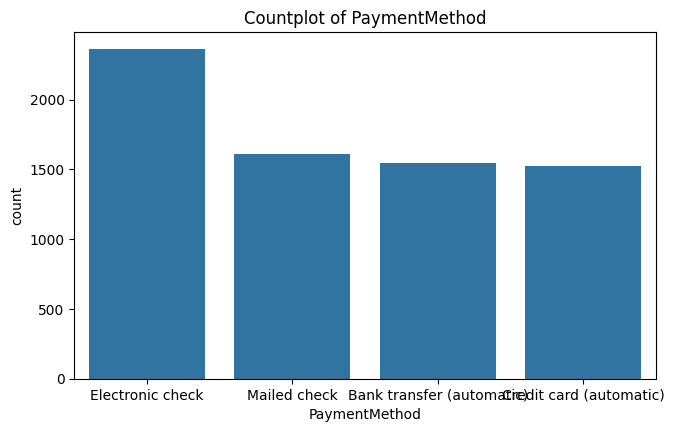

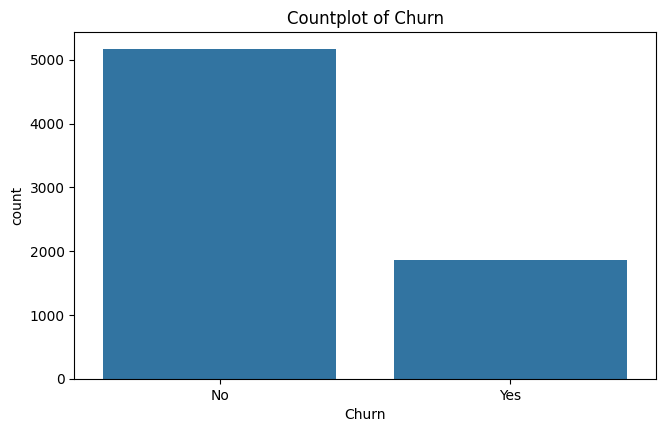

In [35]:
# Get all columns with object (categorical) data type
object_cols = df.select_dtypes(include="object").columns.to_list()

# Add 'SeniorCitizen' column manually (since it's numeric but categorical in nature)
object_cols = ["SeniorCitizen"] + object_cols

# Loop through all categorical columns and plot their value counts
for col in object_cols:
  plt.figure(figsize=(7.5, 4.5))     # set figure size
  sns.countplot(x=df[col])      # create bar chart of category counts
  plt.title(f"Countplot of {col}")      # add title with column name
  plt.show()      # show the plot

## **Data Preprocessing**

In [36]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Label Encoding of target column

In [37]:
# Convert 'Churn' column to binary: Yes=1, No=0
df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})

/tmp/ipython-input-37-1155329189.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})


In [38]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [39]:
# Count how many 0s and 1s in 'Churn' column
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


### Label Encoding of Categorical features

In [40]:
# Identifying column with object datatype
object_columns = df.select_dtypes(include="object").columns

In [41]:
# Print list of object (categorical) columns in the DataFrame
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [42]:
# Dictionary to store LabelEncoders for each categorical column
encoders = {}

# Loop through each categorical column and apply Label Encoding
for column in object_columns:
  label_encoder = LabelEncoder()      # create a new LabelEncoder
  df[column] = label_encoder.fit_transform(df[column])      # convert text to numbers
  encoders[column] = label_encoder      # save the encoder for future use

# Save all LabelEncoders to a file using pickle
with open("label_encoders.pkl", "wb") as file:
  pickle.dump(encoders, file)     # write encoders dictionary to file

In [43]:
# Show the dictionary of LabelEncoders for each categorical column
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### **Training & Test data split**

In [45]:
# Features: all columns except 'Churn'
x = df.drop(columns=["Churn"])

# Target: the 'Churn' column
y = df["Churn"]

In [46]:
# Show the feature data (without the 'Churn' column)
print(x)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [47]:
# Show the target values (only the 'Churn' column)
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [48]:
# Split data into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
# Show the shape (rows, ) of training labels
print(y_train.shape)

(5634,)


In [50]:
# Count how many 0s and 1s in training labels
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


## **Synthetic Minority Over-sampling Technique**

In [51]:
# Create SMOTE object to balance classes by oversampling the minority class
smote = SMOTE(random_state=42)

In [52]:
# Apply SMOTE to create balanced training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [53]:
# Show the shape of the balanced training labels
print(y_train_smote.shape)

(8276,)


In [54]:
# Count how many 0s and 1s after applying SMOTE
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


## **Model Training**

### **Training with default hyperparameters**

In [55]:
# Create a dictionary of ML models with names as keys — useful for training and comparing models in a loop
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),     # Decision Tree Model
    "Random Forest": RandomForestClassifier(random_state=42),     # Random Forest Model
    "XGBoost": XGBClassifier(random_state=42)     # XGBoost Model
}

In [56]:
# Dictionary to store cross-validation scores
cv_scores = {}

# Train and evaluate each model using 5-fold cross-validation
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")

  # Perform cross-validation and get accuracy scores
  scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring="accuracy")

  # Save scores for this model
  cv_scores[model_name] = scores

  # Print average accuracy
  print(f"{model_name} cross validation accuracy: {np.mean(scores):.2f}")

  # Print a separator line for better readability
  print("-"*50)

Training Decision Tree with default parameters
Decision Tree cross validation accuracy: 0.78
--------------------------------------------------
Training Random Forest with default parameters
Random Forest cross validation accuracy: 0.84
--------------------------------------------------
Training XGBoost with default parameters
XGBoost cross validation accuracy: 0.83
--------------------------------------------------


In [57]:
# Show cross-validation scores for each model
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

### **Random Forest gives the highest accuracy compared to other models with default parameters**

In [58]:
# Create a Random Forest model with fixed random state
rfc = RandomForestClassifier(random_state=42)

In [59]:
# Train the Random Forest model on balanced training data
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [60]:
# Count how many 0s and 1s in the test labels
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


## **Model Evaluation**

In [61]:
# Predict the labels for the test set
y_test_pred = rfc.predict(x_test)

# Evaluate the model performance on test data
print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))     # overall accuracy
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))     # True vs predicted labels
print("Classification Report:\n", classification_report(y_test, y_test_pred))     # Precision, Recall, F1-score

Accuracy Score:
 0.7785663591199432
Confusion Matrix:
 [[878 158]
 [154 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [62]:
# Save the trained model and feature names in a dictionary
model_data = {
    "model": rfc,     # trained Random Forest model
    "features_names": x.columns.tolist()      # list of feature (column) names
    }

# Save the model data to a file using pickle
with open("customer_churn_model.pkl", "wb") as file:
  pickle.dump(model_data, file)     # write model and features to file

## **Load the saved model & build the Predictive system**

In [63]:
# Load the saved model and feature names from the pickle file
with open("customer_churn_model.pkl", "rb") as file:
  model_data = pickle.load(file)      # load the dictionary

loaded_model = model_data["model"]      # get the trained model
features_names = model_data["features_names"]     # get the feature names

In [64]:
# Display the loaded Random Forest model
print(loaded_model)

RandomForestClassifier(random_state=42)


In [65]:
# Show the list of feature names used to train the model
print(features_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [66]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# Create a DataFrame from input data
input_data_df = pd.DataFrame([input_data])

# Load the saved LabelEncoders
with open("label_encoders.pkl", "rb") as file:
  encoders = pickle.load(file)      # load the saved LabelEncoders

# Apply Label Encoding to categorical columns
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# Make prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# Print results
print(prediction)

# Display prediction in human-readable format
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[0]
Prediction: No Churn
Prediciton Probability: [[0.78 0.22]]


In [67]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}